## Clasificación Múltiple con el Dataset MINST

### Cargar el Dataset de MINST

IMportemos el mdoulo de FASHION_MINST desde keras

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.datasets import fashion_mnist

2.10.0


Carguemos los datos a nuestras tuplas clásicas de Train y test

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Exploración de Datos

Obten el Shape de XTrain

In [3]:
X_train.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [4]:
y_train.shape

(60000,)

Obten el Shape de XTest

In [5]:
X_test.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [6]:
y_test.shape

(10000,)

Activa Matplotlib inline

In [7]:
%matplotlib inline

Importa matplotlib como plt

In [8]:
import matplotlib.pyplot as plt

Importa Seaborn

In [9]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

Pon su escala a 2

In [ ]:
sns.set(font_scale = 2)

Importa Numpy

In [ ]:
import numpy as np

Ahora armate un programa que muestre 24 digitos

In [ ]:
indice = np.random.choice(np.arange(len(X_train)), 24, replace = False)

In [ ]:
indice

array([32220, 25117, 34199, 30537, 54640, 20770, 33898, 26825, 10567,
       23407, 33278,  1942,  9282, 27582, 13908, 37397, 55970, 10401,
       30821, 53952, 57208,  3878, 24414,  6189])

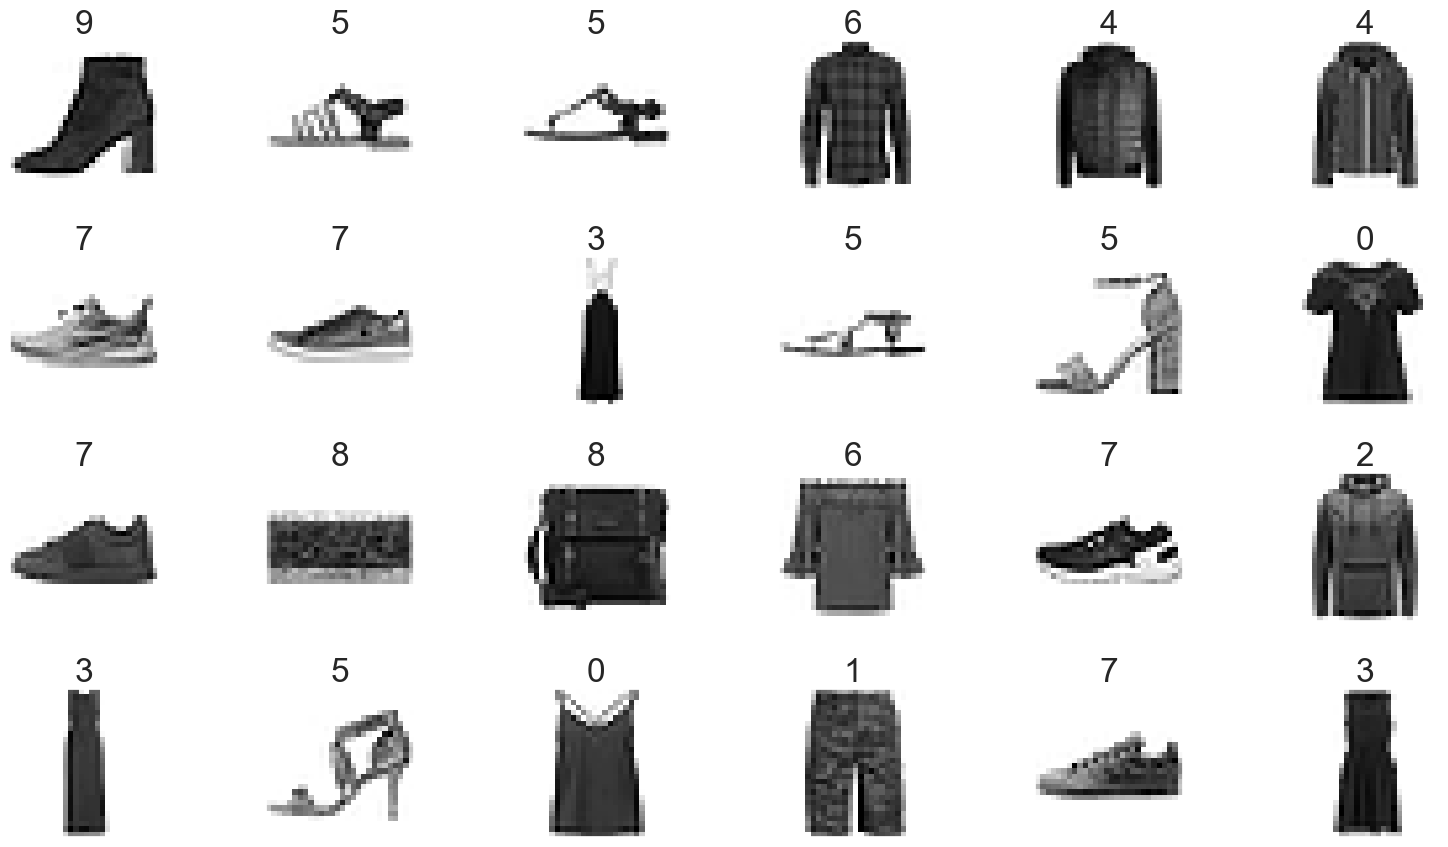

In [ ]:
figure,axes = plt.subplots(nrows = 4, ncols = 6, figsize = (16,9))

for item in zip(axes.ravel(), X_train[indice], y_train[indice]):
    axes, image, target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

# Crea una figura (figure) y una cuadrícula de 4x6 subgráficos (axes).
# Itera sobre las 24 celdas del gráfico, mostrando la imagen del dígito (X_train) y usando la etiqueta real (y_train) como título.
# Elimina los ejes x e y para centrarse solo en la imagen del dígito.

### Preparar los datos

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

In [ ]:
X_train = X_train.reshape((60000,28,28,1))
# Remodela la matriz de imágenes de entrenamiento (X_train) para adaptarla al formato requerido por las CNN: 
# (número de muestras, alto de la imagen, ancho de la imagen, número de canales de color).

Checa su shape

In [ ]:
X_train.shape

(60000, 28, 28, 1)

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

In [ ]:
X_test = X_test.reshape((10000,28,28,1))
# Remodela la matriz de imágenes de prueba (X_test) al formato 4D requerido por la CNN: 
# (número de muestras, alto, ancho, canales).

Checa su Shape

In [ ]:
X_test.shape

(10000, 28, 28, 1)

Normaliza con astype Xtrain

In [ ]:
X_train = X_train.astype("float32")/255
# Normalizar los datos para escalar los valores de los px 0 y 1, lo que mejora el rendimiendo y la estabilidad del modelo

Normaliza con astype Xtest

In [ ]:
X_test = X_test.astype("float32")/255


Desde tensorflow importa to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

aplicalo a Y_train

In [ ]:
y_train = to_categorical(y_train)
# Convierte las etiquetas de clase (ej. 0, 1, 2) del conjunto de entrenamiento al formato "One-Hot Encoding", requerido por la capa de salida de una Red Neuronal.

Checa su shape

In [ ]:
y_train.shape

(60000, 10)

Checa el primer dato de Y_train

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Aplica to_categorical a Y-test

In [ ]:
y_test = to_categorical(y_test) # Convierte las etiquetas de clase (ej. 0, 1, 2) del conjunto de PRUEBA al formato "One-Hot Encoding".

Checa su figura

In [ ]:
y_test.shape

(10000, 10)

### Crear la Red Neuronal

Importa Sequential desde tf

In [ ]:
from tensorflow.keras.models import Sequential

Crea tu objeto cnn

In [ ]:
cnn = Sequential()

importa las capas que necesitaras desde tf

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense #Diferentes capas que van a formar nuestra "capa oculta" (Dense de salida , el resto capa oculta)

agrega la capa de Conv2d

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation = "relu", input_shape=(28,28,1))) #Datos procesados por la primera capa de convolución

c:\Users\Abri\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ahora agrega una capa de Pooling2d

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Agrega otra caba de Conv2D

In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", input_shape=(28,28,1))) #Más filtros para conectar, más características detectadas en nuestras imagenes.

Y otra de Pooling

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2,2))) # Añade una capa de Max Pooling para reducir la dimensionalidad espacial (alto y ancho) de la salida de la capa convolucional previa, utilizando una ventana de 2x2.

Aplana los resultados

In [ ]:
cnn.add(Flatten()) # Añade una capa de Aplanamiento (Flatten), que convierte la matriz 3D de características en un vector 1D, preparándola para la conexión a las capas densas (fully connected).

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,496 (291.00 KB)

 Trainable params: 74,496 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Agrega una capa DENSE

In [ ]:
cnn.add(Dense(units=128, activation="relu"))
#Capa totalmente conectada con 128 neuronas ocultas
#Cada neurona esta conectada con todas las salidas de la capa anterior (Flatten)
#La activación ReLU introduce la no linealidad, permitiendo al modelo aprender patrones complejos

Y otra DENSE

In [ ]:
cnn.add(Dense(units=10, activation="softmax"))
#Capa de salida con 10 neuronas, una por cada clase (en MNIST son los dígitos del 0 al 9)
#La activación Softmax convierte las salidas en probabilidades que suman 1
#Esto indica la probabilidad de que la imagen pertenezca a cada dígito

Imprime el resultado en un resumen

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Compila tu modelo

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

In [ ]:
cnn.fit?
#x,y datos de entranamiento/etiquetas
#epochs = nº de veces que un modelo debería procesar todo el set de datos
#batch_size = nº de muestras a procesar una vez durante un epoch

Signature:
cnn.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(inpu

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1) #Esta linea no es poca cosa porque normalmente con datasets mas grandes cada pase(epochs) son 30seg en orddenadores buenos

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 170s 199ms/step - accuracy: 0.8356 - loss: 0.4559 - val_accuracy: 0.8778 - val_loss: 0.3343
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 219s 259ms/step - accuracy: 0.8908 - loss: 0.3023 - val_accuracy: 0.8983 - val_loss: 0.2725
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 148s 176ms/step - accuracy: 0.9079 - loss: 0.2525 - val_accuracy: 0.8997 - val_loss: 0.2714
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.9171 - loss: 0.2229 - val_accuracy: 0.9102 - val_loss: 0.2406
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 136s 161ms/step - accuracy: 0.9280 - loss: 0.1936 - val_accuracy: 0.9148 - val_loss: 0.2314


Evalua le modelo con Evaluate

In [ ]:
loss,accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9095 - loss: 0.2490


In [ ]:
loss #mide que tan mal predice el modelo

0.24904370307922363

In [ ]:
accuracy #El porcentaje de aciertos sobre el conjunto de prueba

0.909500002861023

Vamos a hacer predicciones

In [ ]:
predicciones = cnn.predict(X_test)
# Usa el modelo entrenado (cnn) para generar las predicciones sobre el conjunto de datos de prueba (X_test).
# El resultado es una matriz de probabilidades (una fila por cada imagen).

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


checa que dice el primer elemento de ytest

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Y ahora que dice el primer elemento del modelo

In [ ]:
for index, probability in enumerate(predicciones[0]):
    print(f'{index}: {probability:.10%}')
# Itera sobre el array de probabilidades de la PRIMERA imagen predicha (predicciones[0]),
# mostrando el índice (el dígito predicho) y la probabilidad de pertenecer a esa clase (formato porcentaje con 10 decimales).

0: 0.0000143167%
1: 0.0000001467%
2: 0.0000203478%
3: 0.0000001232%
4: 0.0000000878%
5: 0.0097523887%
6: 0.0000074519%
7: 0.0065208202%
8: 0.0002015121%
9: 99.9834895134%


Ubiquemos las predicciones incorreectas

In [ ]:
images = X_test.reshape((10000,28,28))

In [ ]:
incorrect_predictions=[]

In [ ]:
for i,(p,e)in enumerate(zip(predicciones, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
# Itera sobre todas las predicciones y etiquetas reales. 
# Convierte los vectores de probabilidad (One-Hot) a etiquetas de clase únicas.
# Si la clase predicha no coincide con la clase real, guarda la imagen y los valores para su posterior análisis de errores.

Obten el largo de esa lista

In [ ]:
len(incorrect_predictions)

905

Visualiza las predicciones incorrectas

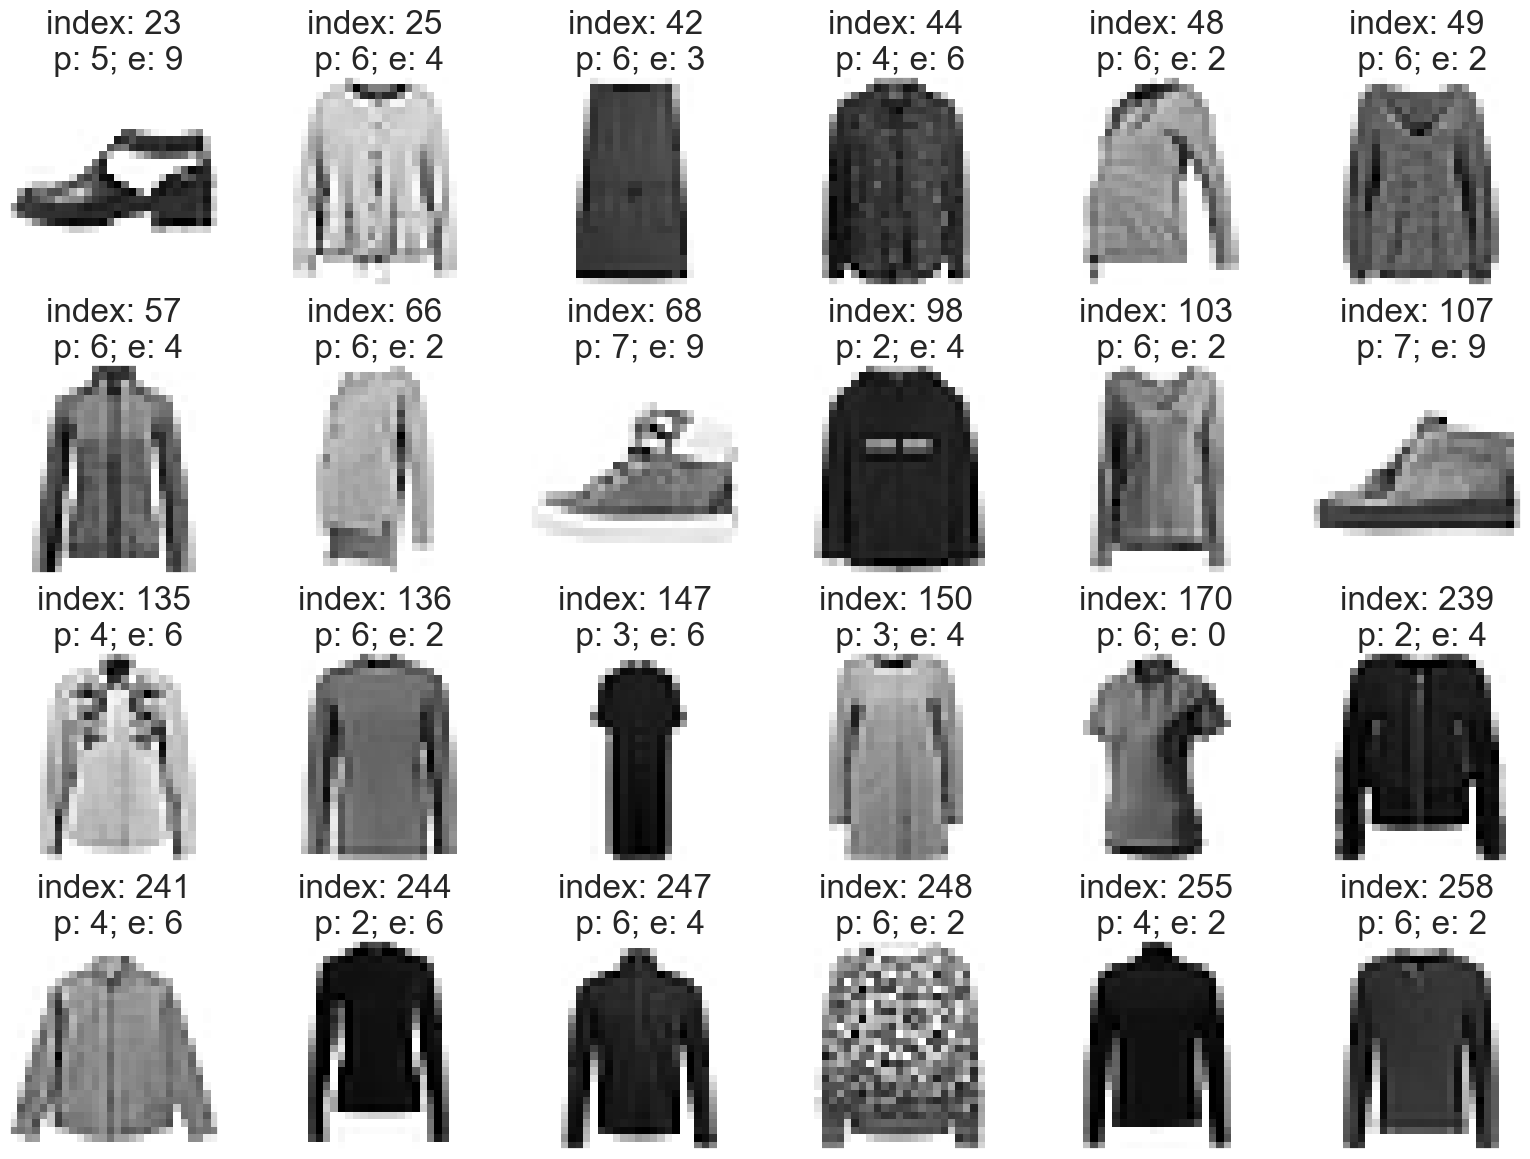

In [ ]:
# Crea una cuadrícula de 4x6 subgráficos.
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index,image,predicted, expected = item
    axes.imshow(image, cmap= plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\n p: {predicted}; e: {expected}')
plt.tight_layout()
#plt.show()

# Itera sobre una lista de errores previamente identificados (incorrect_predictions).
# Muestra cada imagen mal clasificada.
# Etiqueta cada subgráfico con el índice original de la muestra, la clase que el modelo PREDICO ('p') y la clase ESPERADA ('e').
# Esto permite un análisis visual de los errores cometidos por la CNN.

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

In [ ]:
def muestraprob(prediction):
    for index, probability in enumerate(prediction):
        print(f'index: {index}; {probability:.10%}')
# Define una función para iterar sobre el vector de probabilidades de una predicción (prediction),
# mostrando el índice (la clase) y la probabilidad correspondiente en formato porcentaje con 10 decimales.

Muestra una que otra predicción incorrecta a detalles

In [ ]:
muestraprob(predicciones[1790])

index: 0; 0.0038748105%
index: 1; 0.0000273844%
index: 2; 0.0031070991%
index: 3; 0.0026942967%
index: 4; 0.0008759405%
index: 5; 0.4027853254%
index: 6; 0.0067651941%
index: 7; 98.5899090767%
index: 8; 0.0088360044%
index: 9; 0.9811263531%


### Guardar tu Modelo

In [ ]:
cnn.save("mnist_cnn.h5") #Queremos guardarlo para evitarnos repetir el costoso entrenamiento

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
dan = load_model("mnist_cnn.h5") #Volver a cargar el modelo guardado y previamente entrenado de cnn

## Analisis de Sentimientos con Redes Neuronales - Reuters

### Cargar el dataset de Reuters

Import el dataset de reuters desde tensorlfow.keras.datasets

In [ ]:
from tensorflow.keras.datasets import reuters

Carga las 10000 palabras que mas ocurren

In [ ]:
numeropalabras = 10000

Carga tus palabras en tus datasets X_train y X_test y asi

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=numeropalabras)

### Exploracion de Datos

Figura de X_train

In [ ]:
x_train.shape

(8982,)

Figura de Y_train

In [ ]:
y_train.shape

(8982,)

Figura de X_test

In [ ]:
x_test.shape

(2246,)

Figura de y_test

In [ ]:
y_test.shape

(2246,)

Apaga pretty print

In [ ]:
%pprint

Pretty printing has been turned OFF


Checa un elemento cualquiera de X_train

In [ ]:
x_train[150] #muestra un artículo de noticia culaquierta, aun no esta traducido a palabras

[1, 4, 990, 1905, 10, 78, 29, 2014, 5, 248, 1827, 1610, 348, 102, 35, 15, 13, 246, 338, 1827, 1250, 117, 78, 206, 4, 1330, 34, 968, 6, 318, 135, 347, 5, 4, 474, 34, 349, 28, 156, 35, 15, 4, 474, 7377, 1158, 4, 6390, 13, 248, 1827, 1434, 1471, 2, 4, 474, 75, 1158, 4, 8234, 400, 3135, 364, 4, 232, 6905, 703, 955, 4, 4729, 1827, 364, 43, 339, 43, 507, 100, 1827, 1610, 4, 474, 189, 2814, 6, 4, 424, 17, 12]

Llama la función word to index

In [ ]:
word_to_index = reuters.get_word_index() #obtiene el diccionario de las palabras por indice

Checa el indice de la palabra "bad"

In [ ]:
word_to_index["bad"]

1856

Reversa el mapeo del diccionario Word to INdex a Index to Word

In [ ]:
index_to_word = {index: word for (word,index) in word_to_index.items()} #Invertir el diccionario creando uno nuevo

In [ ]:
index_to_word[1856]

'bad'

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

In [ ]:
[index_to_word[i] for i in range(1,51)]

['the', 'of', 'to', 'in', 'said', 'and', 'a', 'mln', '3', 'for', 'vs', 'dlrs', 'it', 'reuter', '000', '1', 'pct', 'on', 'from', 'is', 'that', 'its', 'cts', 'by', 'at', 'year', 'be', 'with', '2', 'will', 'was', 'billion', 'he', 'u', 's', 'net', 'has', 'would', 'an', 'as', '5', 'not', 'loss', '4', '1986', 'company', 'which', 'but', 'this', 'shr']

Ok, ya estamos listos para leer una noticia

In [ ]:
" ".join([index_to_word.get(i-3, "?") for i in x_train[123]]) #Convertir la noticia 123 de formato indices a palabras legibles

'? there were six grain ships loading and six ships were waiting to load at portland according to the portland merchants exchange reuter 3'

Y revisa de Y_train la clasificacion de esta noticia

In [ ]:
y_train[123] #Lo que indica es si la noticia es positiva o negativa 
#0 = negativa
#1 = positiva

np.int64(1)

### Preparación de datos

Define palabras_por_noticia en 200

In [ ]:
num_palabras_por_resena = 200

Importa pad_sequences de tensroflow

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences #funcion para normalizar la longitud de las secuencias

Define X_train como pad_sequences del viejo X_train

In [ ]:
x_train = pad_sequences(x_train, maxlen=num_palabras_por_resena) #Nos asegurasmos que todas las noticias tengan la maima longitud

Checa el nuevo shape de X_train

In [ ]:
x_train.shape

(8982, 200)

Hay que reconfigurar X_Test tambien

In [ ]:
x_test = pad_sequences(x_test, maxlen=num_palabras_por_resena)

Checa su figura

In [ ]:
x_test.shape

(2246, 200)

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=11)

Checa la figura de xtest

In [ ]:
x_train.shape

(7185, 200)

Y la de XVal

In [ ]:
x_val.shape

(1797, 200)

### Crear la red neuronal

Desde Tensorflow importa Sequencial

In [ ]:
from tensorflow.keras.models import Sequential

arma el objeto rnn com oun sequential

In [ ]:
model = Sequential()

Importa las capas Dense y LSTM

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

Agrega la capa de Embedding, que salgan 128 dimensiones

In [ ]:
#Capa Embedding: convierte los índices de palabras en vectores de caracterísiticas
# - input_dim: tamaño del vocabulario (nº de palabras)
#output_dim: tamaño del vector de salida para cada palabra (dimensión de embedding)
#input_length: longitud máxima de cada noticia

model.add(Embedding(input_dim=10000, output_dim=128, input_length=num_palabras_por_resena))

c:\Users\Abri\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


agrega la capa de LSTM

In [ ]:
#Capa LSTM: red recurrente que captura dependencias en secuencias de texto
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

Agrega una capa DENSE

In [ ]:
#Capa final Dense: una neurona con activacion sigmoide para casificar 0(negativo) o 1(positivo)
model.add(Dense(1, activation = "sigmoid"))

Compila el RNN

In [ ]:
#Compilar el modelo especificado
#optimizador: adam (buen punto de partida general)
#funcion de perdida(loss) "binary_crossentropy" (para clasificacion binaria)
#metricas: precision

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Y resvisa el resultado de RNN

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 413ms/step - accuracy: 0.0462 - loss: -210.6111 - val_accuracy: 0.0467 - val_loss: -338.9490
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 94s 416ms/step - accuracy: 0.0463 - loss: -453.1182 - val_accuracy: 0.0467 - val_loss: -565.4077
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 119s 532ms/step - accuracy: 0.0463 - loss: -678.1920 - val_accuracy: 0.0467 - val_loss: -788.9319
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 139s 618ms/step - accuracy: 0.0463 - loss: -902.2217 - val_accuracy: 0.0467 - val_loss: -1013.5601
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 130s 576ms/step - accuracy: 0.0463 - loss: -1128.1560 - val_accuracy: 0.0467 - val_loss: -1238.2169
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 146s 647ms/step - accuracy: 0.0463 - loss: -1352.0564 - val_accuracy: 0.0467 - val_loss: -1461.4777
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 172s 512ms/step - accuracy: 0.0463 - loss: -1575.0199 - val_accuracy: 0.0467 - val_loss: -1683.4122
Epoch 8/10
225/225 ━━━━━━━━━━

Checa tus resultados

In [ ]:
resultados = model.evaluate(x_test, y_test)
# Evalúa el rendimiento del modelo entrenado (model) utilizando los datos de prueba (x_test) y sus etiquetas reales (y_test).
# El resultado (resultados) es una lista que contiene el valor de la Pérdida (Loss) y las métricas configuradas (ej. Precisión/Accuracy).

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.0467 - loss: -2349.8560


Y revisa el resultado

In [ ]:
resultados  #Funcion de pérdida y % de la exactitud del modelo

[-2349.85595703125, 0.0467497780919075]